# Carregando dados e a biblioteca pandas

In [19]:
!pip install wordcloud
!pip install nltk
!pip install pandas
!pip install seaborn
!pip install unidecode

In [52]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [20]:
import pandas as pd

# resenha = pd.read_csv('../01.Dados/imdb.csv')
resenha = pd.read_csv('imdb.csv')

resenha.head(10)

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
5,6,"A funny thing happened to me while watching ""M...",Uma coisa engraçada aconteceu comigo enquanto ...,neg
6,7,This German horror film has to be one of the w...,Este filme de terror alemão tem que ser um dos...,neg
7,8,"Being a long-time fan of Japanese film, I expe...","Sendo um fã de longa data do cinema japonês, e...",neg
8,9,"""Tokyo Eyes"" tells of a 17 year old Japanese g...","""Tokyo Eyes"" fala de uma menina japonesa de 17...",neg
9,10,Wealthy horse ranchers in Buenos Aires have a ...,Fazendeiros ricos em Buenos Aires têm uma long...,neg


# Dividindo dados de trenio e teste

In [0]:
from sklearn.model_selection import train_test_split

treino,teste,classe_treino,classe_teste = train_test_split(resenha.text_pt, 
                                                           resenha.sentiment,
                                                           random_state= 42)

# Exibindo algumas amostras

In [22]:
print("Negativa \n")
print(resenha.text_pt[189])

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [23]:
print("Positivo \n")
print(resenha.text_pt[49002])

Positivo 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

In [24]:
print(resenha.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [25]:
# Pandas replace, transformar string por inteiro ou outras mudanças...

classificacao = resenha['sentiment'].replace(['neg','pos'], [0,1])
classificacao

0        0
1        0
2        0
3        0
4        0
        ..
49454    1
49455    1
49456    1
49457    1
49458    1
Name: sentiment, Length: 49459, dtype: int64

In [26]:
resenha['classificacao'] = classificacao
resenha.head(10)

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
5,6,"A funny thing happened to me while watching ""M...",Uma coisa engraçada aconteceu comigo enquanto ...,neg,0
6,7,This German horror film has to be one of the w...,Este filme de terror alemão tem que ser um dos...,neg,0
7,8,"Being a long-time fan of Japanese film, I expe...","Sendo um fã de longa data do cinema japonês, e...",neg,0
8,9,"""Tokyo Eyes"" tells of a 17 year old Japanese g...","""Tokyo Eyes"" fala de uma menina japonesa de 17...",neg,0
9,10,Wealthy horse ranchers in Buenos Aires have a ...,Fazendeiros ricos em Buenos Aires têm uma long...,neg,0


# Construção de vocabulário(Bag of words)

## Feature extration

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Assisti um filme ótimo","Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase = False)
bag_of_words = vetorizar.fit_transform(texto)
vetorizar.get_feature_names() # Detalhe, ele coloca todas as letras minúsculas

['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [28]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [29]:
matriz_sparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                                   columns=['assisti', 'filme', 'ruim', 'um', 'ótimo'])
matriz_sparsa

,assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


# Função que prepara o modelo, divide os dados e retorna o resultado do treinamento

In [30]:
from sklearn.linear_model import LogisticRegression
def classificar_texto(texto, coluna_texto, coluna_classificacao):

    vetorizar = CountVectorizer(lowercase = False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                                  texto[coluna_classificacao],
                                                                  random_state = 42)

    regressao_logistica = LogisticRegression(solver='lbfgs')
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste,classe_teste)
print(classificar_texto(resenha, "text_pt","classificacao"))

0.6583097452486858


# Gerar uma word cloud(gráfico de palavras)

In [0]:
# fazer o matplotlib plotar no próprio jupyter
%matplotlib inline 
from wordcloud import WordCloud

todas_palavras = ''.join([texto for texto in resenha['text_pt']])
#len(todas_palavras)

In [0]:
nuvem_palavras = WordCloud(width=800, 
                           height=500,
                           max_font_size=110).generate(todas_palavras)

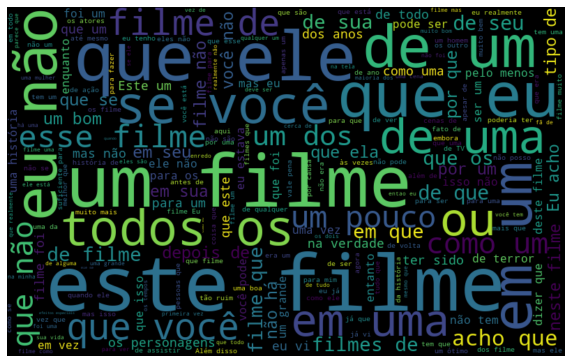

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras,interpolation='bilinear')
plt.axis('off')
plt.show()

GRANDE NÚMERO DE PALAVRAS NÃO NECESSÁRIAS(PRONOMES, ARTIGOS, PREPOSIÇÕES) E FRASES, POUCO SE PODE CONCLUIR ALGO COM ISSO.

In [34]:
resenha.query("sentiment == 'pos'")

,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


# Função que gera uma word cloud de texto negativos

In [0]:
def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'neg'")
    todas_palavras = ''.join([texto for texto in texto_negativo[coluna_texto]])
    nuvem_palavras = WordCloud(width=800, 
                               height=500,
                               max_font_size=110).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras,interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Função que gera uma word cloud de texto positivos

In [0]:
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment == 'pos'")
    todas_palavras = ''.join([texto for texto in texto_positivo[coluna_texto]])
    nuvem_palavras = WordCloud(width=800, 
                               height=500,
                               max_font_size=110).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras,interpolation='bilinear')
    plt.axis('off')
    plt.show()

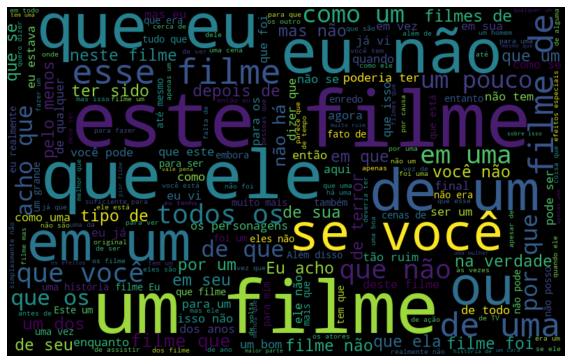

In [37]:
nuvem_palavras_neg(resenha, "text_pt")

PODEMOS VER ALGUMAS PALAVRAS NEGATIVAS COMO 'NÃO' E 'POUCO', MAS AINDA HÁ FRASE E PALAVRAS NÃO NECESSÁRIAS.

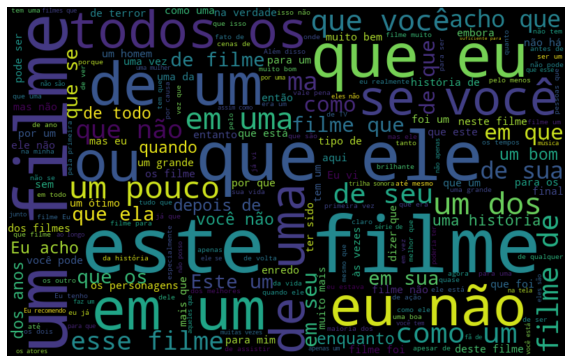

In [38]:
nuvem_palavras_pos(resenha, "text_pt")

PODEMOS VER ALGUMAS PALAVRAS POSITIVAS COMO 'MELHORES'(MUITO PEQUENO), MAS AINDA HÁ FRASE E PALAVRAS NÃO NECESSÁRIAS.

# Trabalhanado com tokenização para eleminar

In [39]:
import nltk

frase = ['Um filme ruim','Um filme bom']
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'Um filme bom': 1, 'Um filme ruim': 1})

In [40]:
from nltk import tokenize

frase = "Bem vindo ao mundo do PLN!"
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']


In [0]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

In [42]:
frequencia

FreqDist({'Mais': 1469,
          'uma': 130883,
          'vez,': 1927,
          'o': 244836,
          'Sr.': 1738,
          'Costner': 50,
          'arrumou': 3,
          'um': 216380,
          'filme': 117484,
          'por': 61330,
          'muito': 51747,
          'mais': 53501,
          'tempo': 10408,
          'do': 101736,
          'que': 325058,
          'necessário.': 128,
          'Além': 3587,
          'das': 16496,
          'terríveis': 576,
          'seqüências': 586,
          'de': 417383,
          'resgate': 151,
          'no': 57140,
          'mar,': 63,
          'quais': 1537,
          'há': 15821,
          'poucas,': 7,
          'eu': 68803,
          'simplesmente': 6433,
          'não': 127894,
          'me': 19136,
          'importei': 109,
          'com': 99166,
          'nenhum': 4528,
          'dos': 41221,
          'personagens.': 1001,
          'A': 30098,
          'maioria': 5565,
          'nós': 3944,
          'tem': 2498

In [43]:
# Após tokenizar, remover artigos, preposições, pronomes, etc.
df_frequencia = pd.DataFrame({"Palavra":list(frequencia.keys()),
                             "Frequencia":list(frequencia.values())})
df_frequencia.nlargest(columns='Frequencia', n=20)

,Palavra,Frequencia
20,de,417383
14,que,325058
42,e,299720
3,o,244836
7,um,216380
102,a,210154
45,é,192359
199,em,132770
1,uma,130883
29,não,127894


In [44]:
import seaborn as sns

#Gráfico de pareto
def pareto(texto, coluna_texto,quantidade):
    todas_palavras = ''.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    plt.figure(figsize=(15,8))
    df_frequencia = pd.DataFrame({"Palavra":list(frequencia.keys()),
                                 "Frequencia":list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns='Frequencia', n=quantidade)
    ax = sns.barplot(data = df_frequencia,
                     x = "Palavra",
                     y = "Frequencia",
                     color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Pareto das palavras mais comuns nos textos

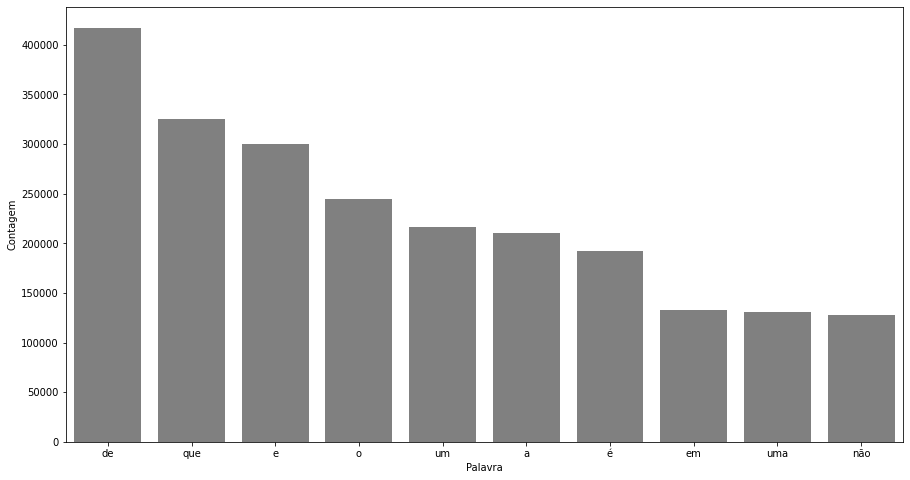

In [45]:
pareto(resenha,'text_pt',10)

# Removendo as Stop Words(palavras irrelevantes)

In [0]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
 
frase_processada = list()
for opiniao in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha['tratamento_1'] = frase_processada

In [56]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [57]:
classificar_texto(resenha, 'tratamento_1','classificacao')

0.6607359482410028

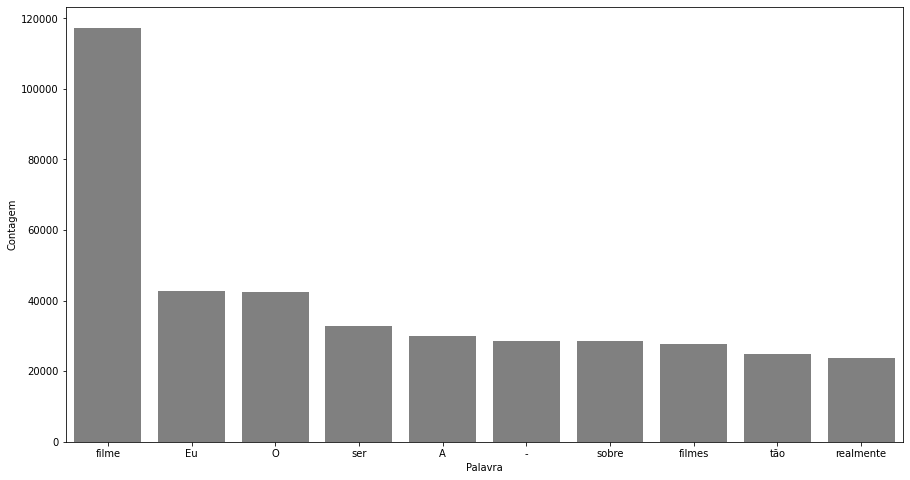

In [58]:
pareto(resenha, 'tratamento_1',10)

VEJA QUE JÁ REMOVEMOS O 'DE' POR EXEMPLO

# Removendo mais stopwords(virgulas, pontos, etc.)

In [59]:
from nltk import tokenize
frase  = 'Olá mundo'
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

print(token_frase)

['Olá', 'mundo']


In [0]:
from string import punctuation

pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)
pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for opiniao in resenha["tratamento_1"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_2'] = frase_processada


In [61]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


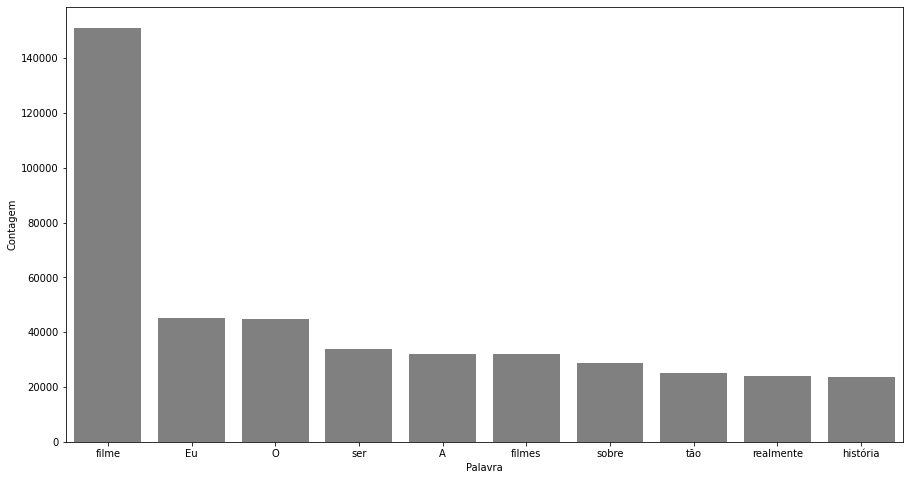

In [62]:
pareto(resenha, 'tratamento_2',10)

# Removendo acentos

In [63]:
import unidecode

acentos = 'ótimo péssimo não é'
teste = unidecode.unidecode(acentos)
print(teste)


otimo pessimo nao e


In [0]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha['tratamento_2']]

In [65]:
sem_acentos[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece estar vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [0]:
### Removendo acentos das palavras

In [67]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]
stopwords_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'de',
 'a',
 'o',
 'que',
 'e',
 'e',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'nao',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'a',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'ja',
 'eu',
 'tambem',
 'so',
 'pelo',
 'pela',
 'ate',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'voce',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'as',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nos',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'voces',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 

In [0]:
resenha['tratamento_3'] = sem_acentos

frase_processada = list()
for opiniao in resenha['tratamento_3']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
resenha['tratamento_3'] = frase_processada

In [69]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [70]:
acuracia_tratamento3 = classificar_texto(resenha, 'tratamento_3','classificacao')
acuracia_tratamento3

0.6810351799433886

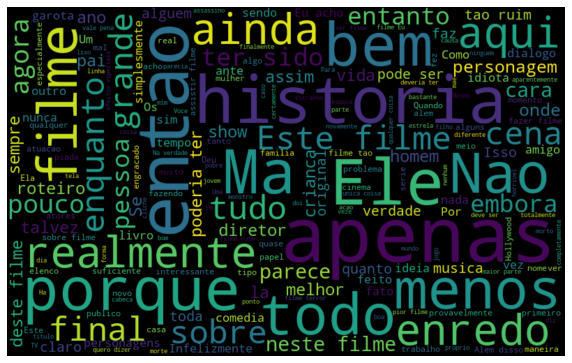

In [71]:
nuvem_palavras_neg(resenha, 'tratamento_3')

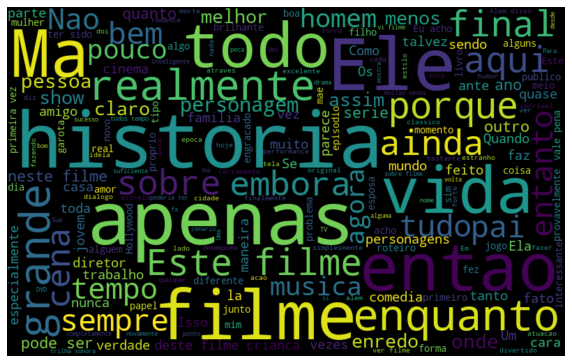

In [72]:
nuvem_palavras_pos(resenha,'tratamento_3')

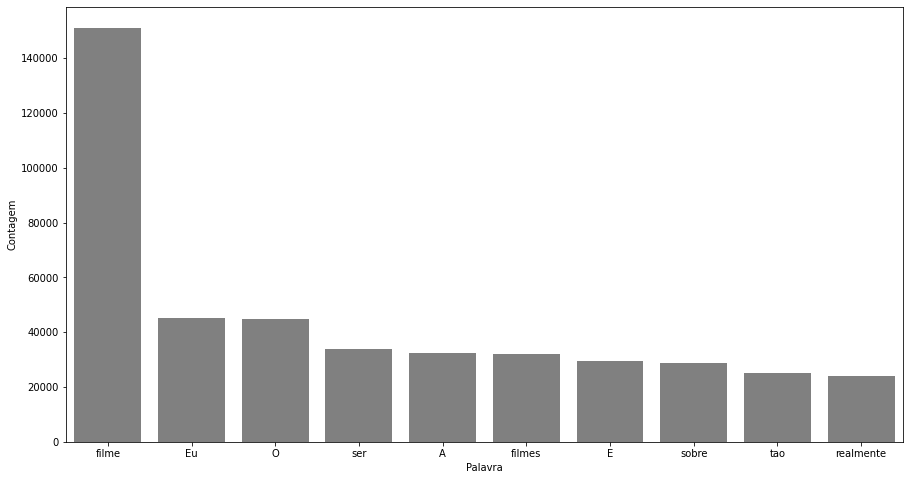

In [73]:
pareto(resenha,'tratamento_3',10)

### Removendo letras maiusculas

In [0]:
frase_processada = list()
for opiniao in resenha['tratamento_3']:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
resenha['tratamento_4'] = frase_processada

In [75]:
resenha['text_pt'][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [76]:
resenha['tratamento_4'][0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece estar vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado ser melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

In [77]:
acuracia_tratamento4= classificar_texto(resenha, 'tratamento_4','classificacao')
print(acuracia_tratamento4)
print(acuracia_tratamento3)

0.6879094217549535
0.6810351799433886


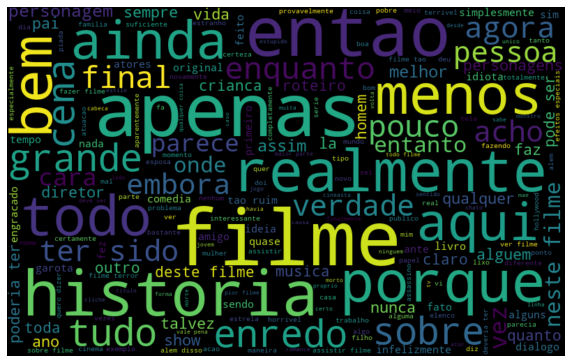

In [78]:
nuvem_palavras_neg(resenha,'tratamento_4')

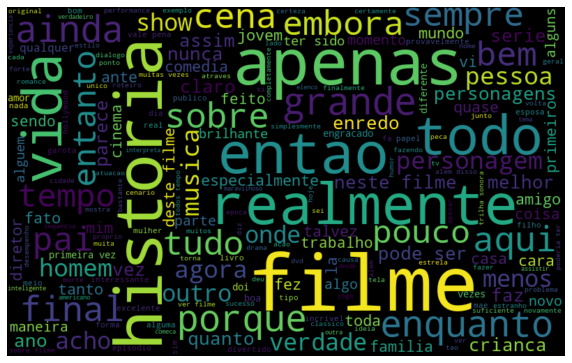

In [79]:
nuvem_palavras_pos(resenha,'tratamento_4')

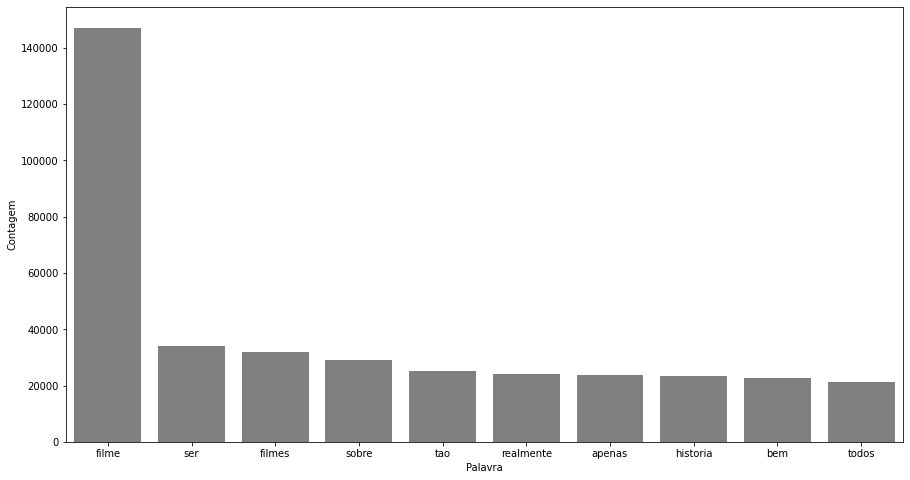

In [80]:
pareto(resenha,'tratamento_4',10)

### Retirando sufixos deixando apenas o radical da palavra

In [81]:
stemmer = nltk.RSLPStemmer()
stemmer.stem('correria')

'corr'

In [0]:
frase_processada = list()
for opiniao in resenha['tratamento_4']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))
resenha['tratamento_5'] = frase_processada

In [83]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3,tratamento_4,tratamento_5
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...,vez sr costn arrum film temp necessari alem te...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...,exempl motiv maior film aca mesm gener chat na...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...,prim tud odei rap imbecil pod agir arm pressio...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...,beatl pud escrev music tod gost emb walt hill ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...,film fot lata palavr apropri verdad tant ous q...


In [84]:
acuracia_tratamento5 = classificar_texto(resenha,'tratamento_5','classificacao')
print(acuracia_tratamento5)
print(acuracia_tratamento4)

0.6943792964011323
0.6879094217549535


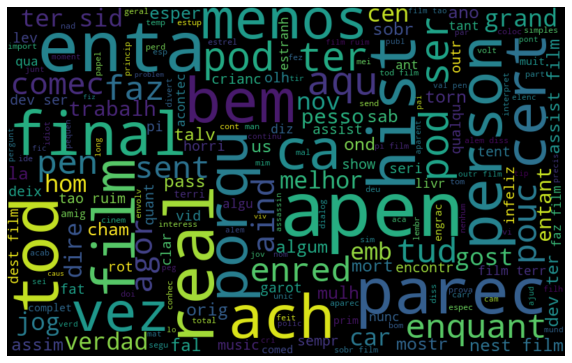

In [85]:
nuvem_palavras_neg(resenha, 'tratamento_5')

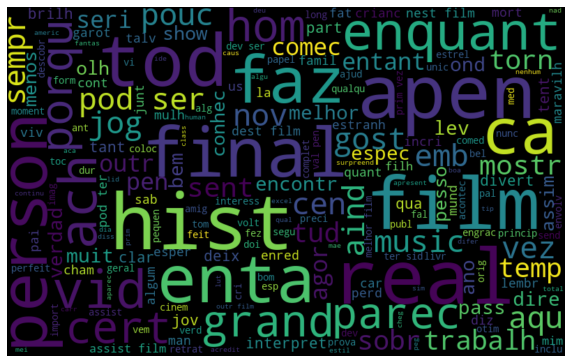

In [86]:
nuvem_palavras_pos(resenha, 'tratamento_5')

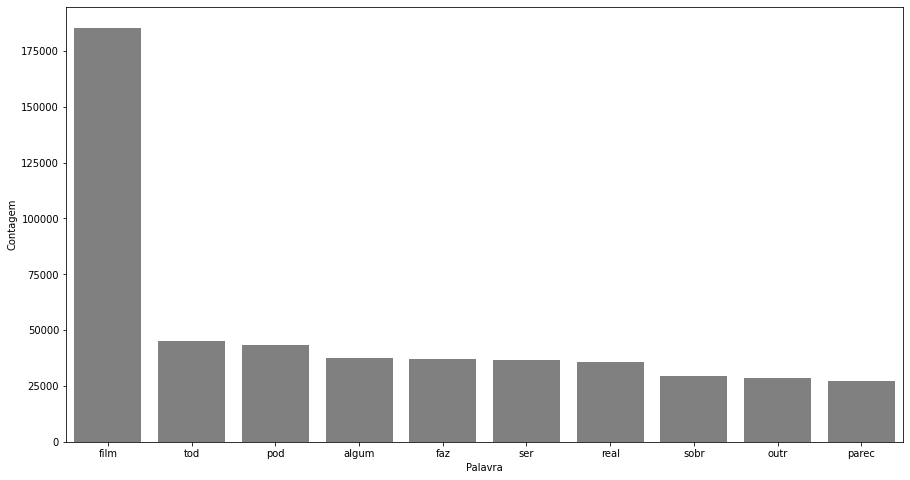

In [87]:
pareto(resenha, 'tratamento_5',10)

### Calcular a frenquência dos termos TF-IDF

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

frase = ['Assisti um filme ótimo','Assiti um filme péssimo']
tfidf = TfidfVectorizer(lowercase=False, max_features=50)
caracteristicas =tfidf.fit_transform(frase)
pd.DataFrame(
    caracteristicas.todense(),
    columns=tfidf.get_feature_names()
)

,Assisti,Assiti,filme,péssimo,um,ótimo
0,0.576152,0.000000,0.409937,0.000000,0.409937,0.576152
1,0.000000,0.576152,0.409937,0.576152,0.409937,0.000000


In [89]:
tfidf_bruto = tfidf.fit_transform(resenha['text_pt'])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto,
                                                              resenha['classificacao'],
                                                              random_state = 42)
regressao_logistica = LogisticRegression(solver='lbfgs')
regressao_logistica.fit(treino, classe_treino)
acuracia_tdidf_bruto = regressao_logistica.score(teste, classe_teste)
acuracia_tdidf_bruto

0.6600889607763849

In [90]:
tfidf_tratados = tfidf.fit_transform(resenha['tratamento_5'])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados,
                                                              resenha['classificacao'],
                                                             random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tdidf_tratados = regressao_logistica.score(teste, classe_teste)
print(acuracia_tdidf_tratados)

0.6988273352203801


### N-grams

In [91]:
from nltk import ngrams

frase = 'Assisti um ótimo filme.'
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme.')]

In [92]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              resenha["classificacao"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)

0.8858875859280226


In [93]:
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              resenha["classificacao"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf)

0.8841892438334007


In [94]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf.get_feature_names()
)
pesos.nlargest(10,0)

,0
otim,8.290477
excel,7.978023
perfeit,6.578863
favorit,5.778018
maravilh,5.286500
incri,5.049495
hilari,4.653807
divert,4.579574
ador,4.422221
brilh,4.268573


In [95]:
pesos.nsmallest(10,0)

,0
pi,-9.175704
ruim,-9.169727
horri,-8.751674
terri,-7.186909
chat,-6.919291
nad,-6.029855
infeliz,-5.310519
decepca,-4.995830
ridicul,-4.950824
nenhum,-4.918832
